In [1]:
!pip install torchviz

In [1]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [2]:
def fix_layout(width=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))
    
fix_layout()

In [3]:
import sys
sys.path.append("..")

from dataset.CustomDataset import CustomDataset
import train
from datetime import datetime
from torch import nn

import torch
from torchviz import make_dot
from train import get_dataset
import pandas as pd

import seaborn as sns; sns.set(); sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt

In [4]:
num_epochs = 200
batch_size = 1000
runs_num = 15
augmentation = True
optimizer = torch.optim.Adam  # RMSprop #torch.optim.Adam

In [5]:
def collect_data_runs(config_model, runs_num=10):
    data = []
    
    for run in range(runs_num): 
        print(f"---- Run {run+1}/{runs_num} ----")
        model, history = train.train(config_model)
        
        for i in range(len(history.epochs)):
            data.append([run, history.epochs[i], history.losses_train[i], history.losses_test[i], history.accs_train[i], history.accs_test[i]])

    df = pd.DataFrame(data, columns=["run", "epoch", "train_loss", "test_loss", "train_accuracy", "test_accuracy"])
    
    return df, model, history

In [6]:
def plot_result(df):
    fig, axs = plt.subplots(2, 1, figsize=(10,16))
    sns.lineplot(x="epoch", y="test_loss", data=df, ax=axs[0], color="red", label="test");
    sns.lineplot(x="epoch", y="train_loss", data=df, ax=axs[0], color="blue", label="train");
    axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss", fontdict={"fontsize":20, "fontweight":1}, pad=15);
    axs[0].legend();

    sns.lineplot(x="epoch", y="test_accuracy", data=df, ax=axs[1], color="red", label="test");
    sns.lineplot(x="epoch", y="train_accuracy", data=df, ax=axs[1], color="blue", label="train");
    axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Accuracy", fontdict={"fontsize":20, "fontweight":1}, pad=15);
    axs[1].legend();

---

In [7]:
from architectures.SimpleConvNet import SimpleConvNet, SimpleConvNetDataset

In [8]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model1 = dict(
    logs_dir=f'./logs/SimpleConvNet/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=SimpleConvNetDataset,
    optimizer=optimizer,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=SimpleConvNet(class_num=10, channels_in=1), #'simple_conv',
    augmentation=augmentation,
    verbose=0
)

df1, model1, history1 = collect_data_runs(config_model1, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


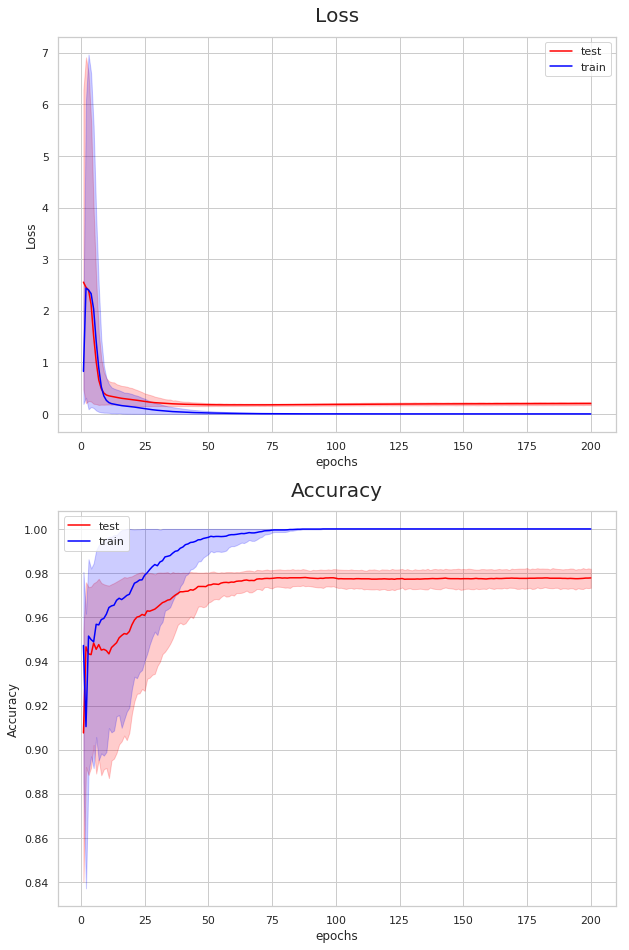

In [9]:
plot_result(df1)

In [9]:
config = dict(batch_size=128, dataset=SimpleConvNetDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

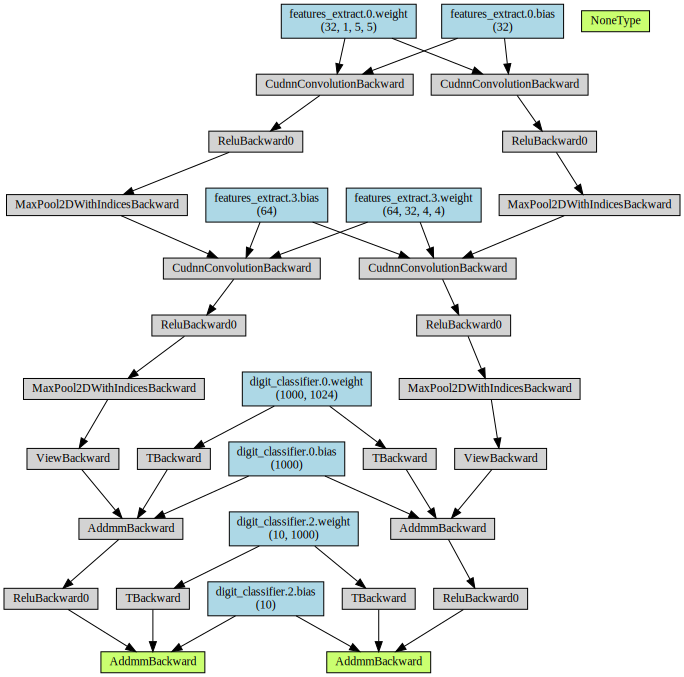

In [11]:
make_dot(model1(i.to('cuda')), params=dict(model1.named_parameters()))

---

In [10]:
from architectures.WeightSharing import WeightSharing, WeightSharingDataset

In [11]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model2 = dict(
    logs_dir=f'./logs/WeightSharing/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=WeightSharingDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=WeightSharing(), #'simple_conv',
    augmentation=augmentation,
    verbose=0
)

df2, model2, history2 = collect_data_runs(config_model2, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


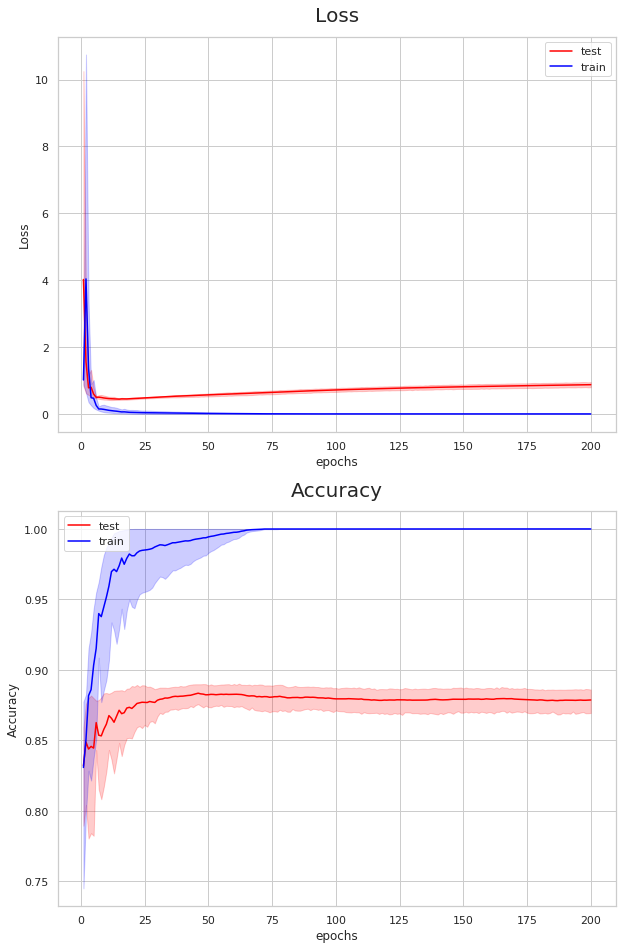

In [12]:
plot_result(df2)

In [15]:
config = dict(batch_size=128, dataset=WeightSharingDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

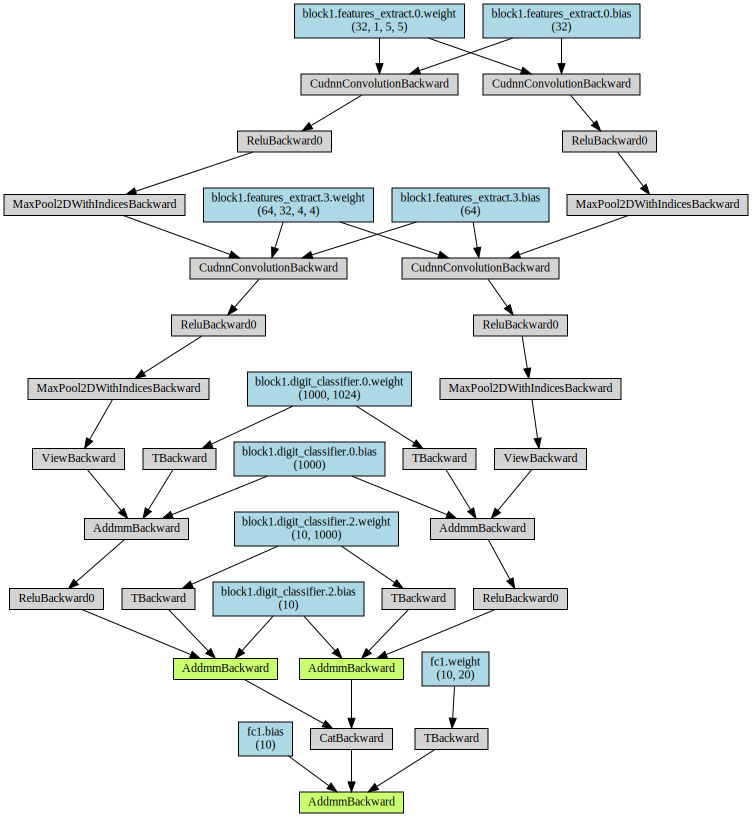

In [16]:
make_dot(model2(i.to('cuda')), params=dict(model2.named_parameters()))

---

In [13]:
from architectures.WeightSharing_AuxLosses import WeightSharingAuxLosses, WeightSharingAuxLossesDataset

In [14]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model3 = dict(
    logs_dir=f'./logs/WeightSharingAuxLosses/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=WeightSharingAuxLossesDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=WeightSharingAuxLosses(), #'simple_conv',
    augmentation=augmentation,
    verbose=0
)

df3, model3, history3 = collect_data_runs(config_model3, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


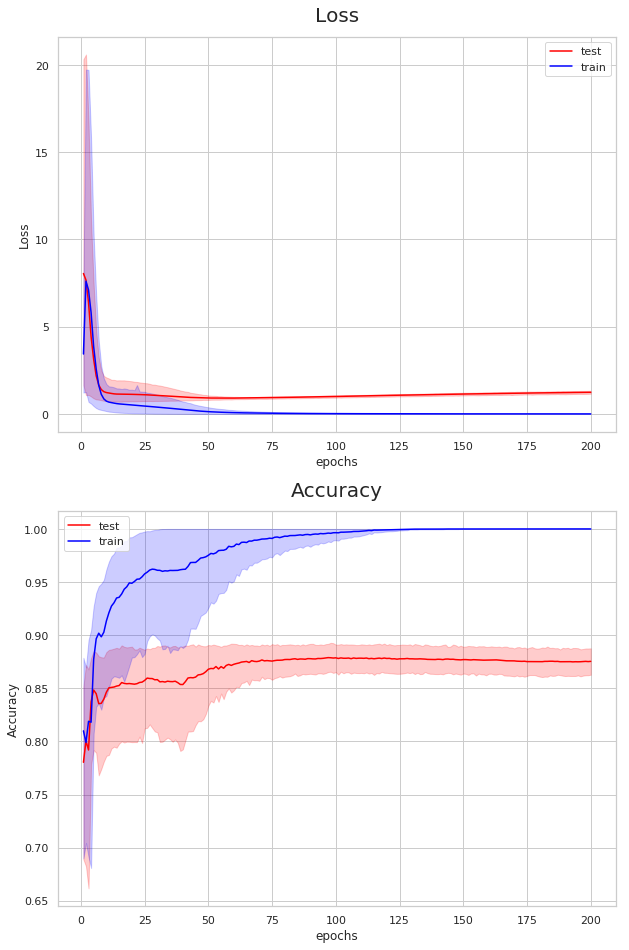

In [15]:
plot_result(df3)

In [20]:
config = dict(batch_size=128, dataset=WeightSharingAuxLossesDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

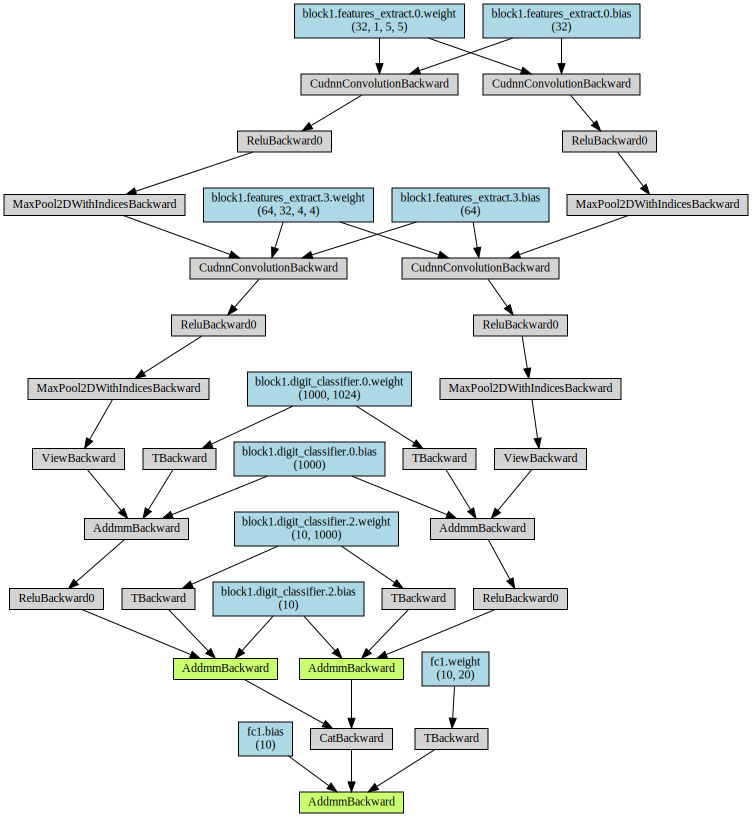

In [21]:
make_dot(model3(i.to('cuda')), params=dict(model3.named_parameters()))

---

In [16]:
from architectures.NoWeightSharing import NoWeightSharing, NoWeightSharingDataset

In [17]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model4 = dict(
    logs_dir=f'./logs/NoWeightSharing/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=NoWeightSharingDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=NoWeightSharing(), #'simple_conv',
    augmentation=augmentation,
    verbose=0
)

df4, model4, history4 = collect_data_runs(config_model4, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


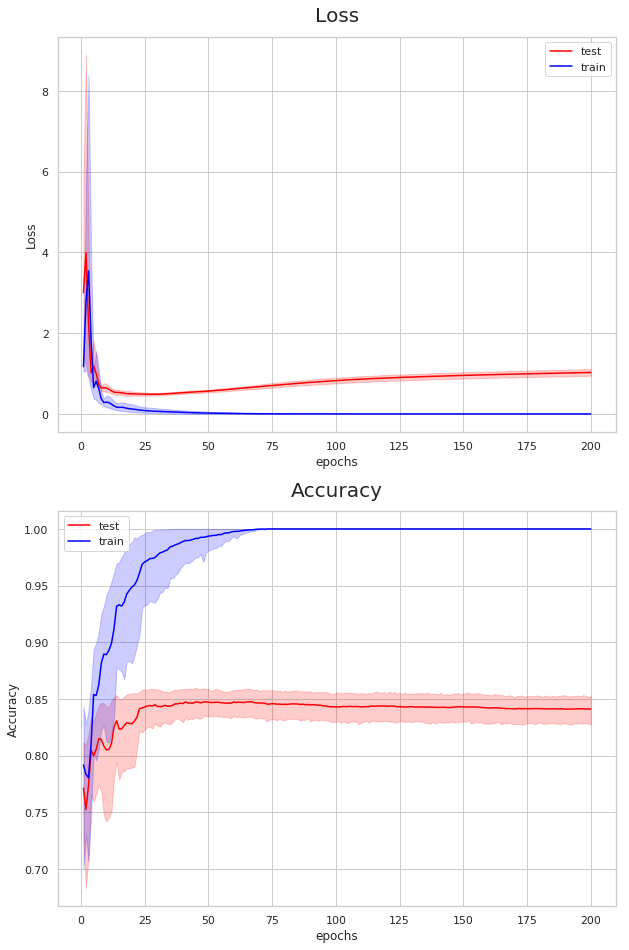

In [18]:
plot_result(df4)

In [25]:
config = dict(batch_size=128, dataset=NoWeightSharingDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

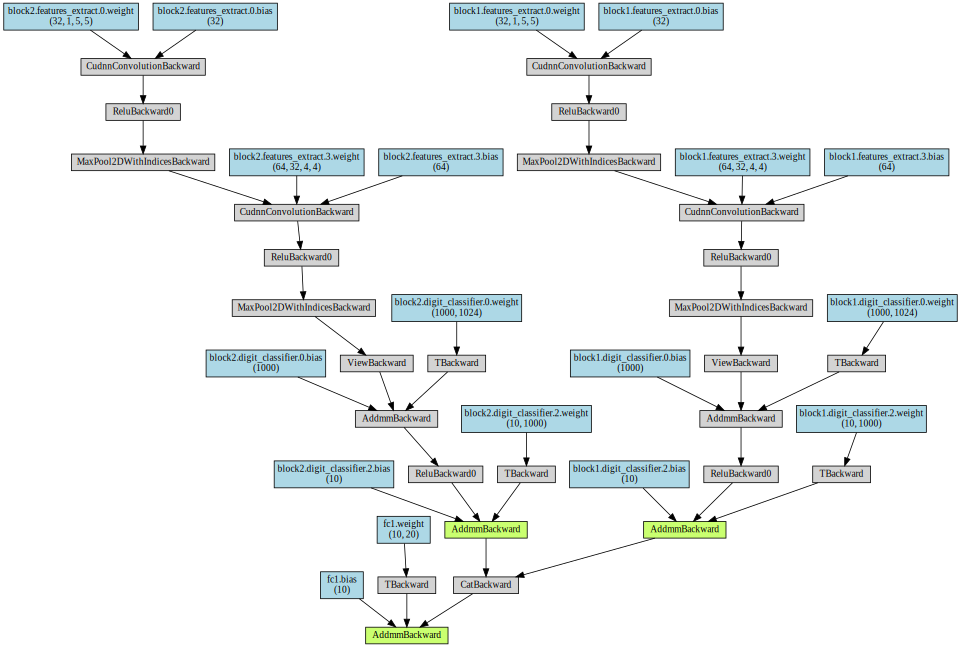

In [26]:
make_dot(model4(i.to('cuda')), params=dict(model4.named_parameters()))

---

In [27]:
# TODO

In [19]:
from architectures.NoWeightSharing_AuxLosses import NoWeightSharingAuxLosses, NoWeightSharingAuxLossesDataset

In [20]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model5 = dict(
    logs_dir=f'./logs/NoWeightSharingAuxLosses/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=NoWeightSharingAuxLossesDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=NoWeightSharingAuxLosses(), #'simple_conv',
    augmentation=augmentation,
    verbose=0
)

df5, model5, history5 = collect_data_runs(config_model5, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


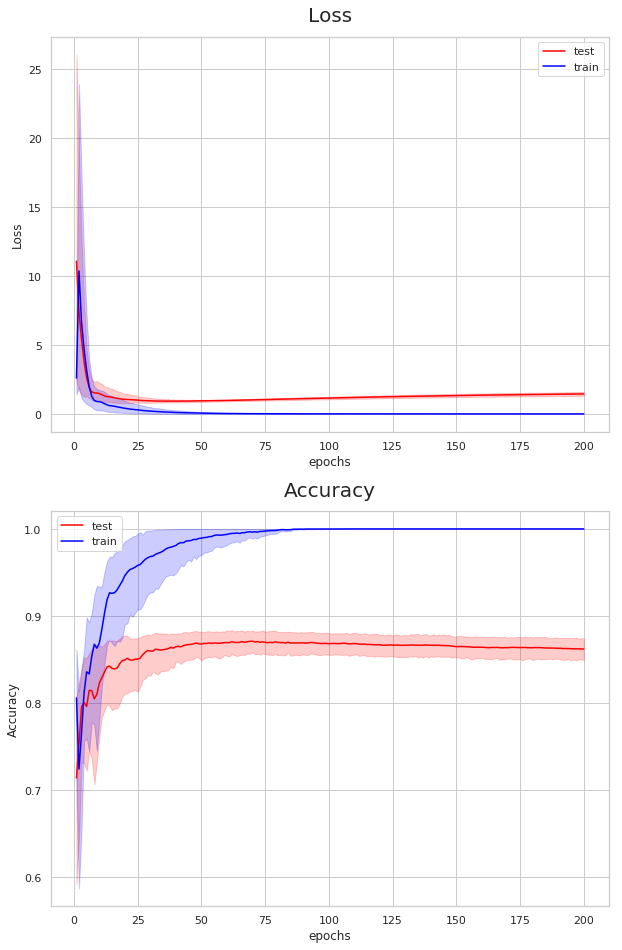

In [21]:
plot_result(df5)

In [31]:
config = dict(batch_size=128, dataset=NoWeightSharingAuxLossesDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

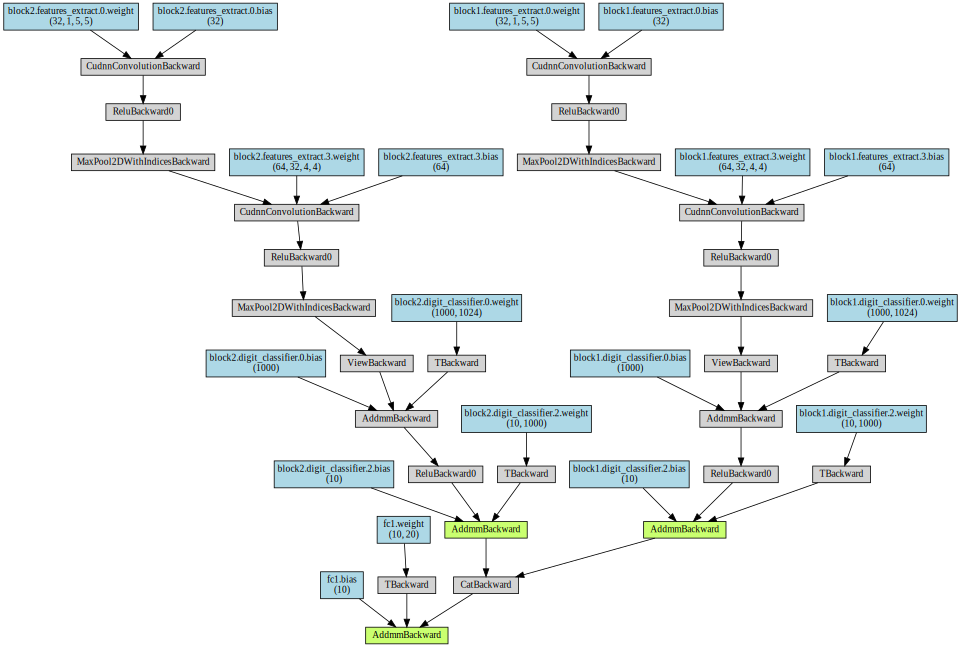

In [32]:
make_dot(model5(i.to('cuda')), params=dict(model5.named_parameters()))

---

# Performance: no augmentation + Adam

In [80]:
nrows = 1500
df1 = pd.read_csv("data/dfs/df1.csv", nrows=nrows)
df2 = pd.read_csv("data/dfs/df2.csv", nrows=nrows)
df3 = pd.read_csv("data/dfs/df3.csv", nrows=nrows)
df4 = pd.read_csv("data/dfs/df4.csv", nrows=nrows)
df5 = pd.read_csv("data/dfs/df5.csv", nrows=nrows)

In [81]:
import matplotlib.pyplot as plt

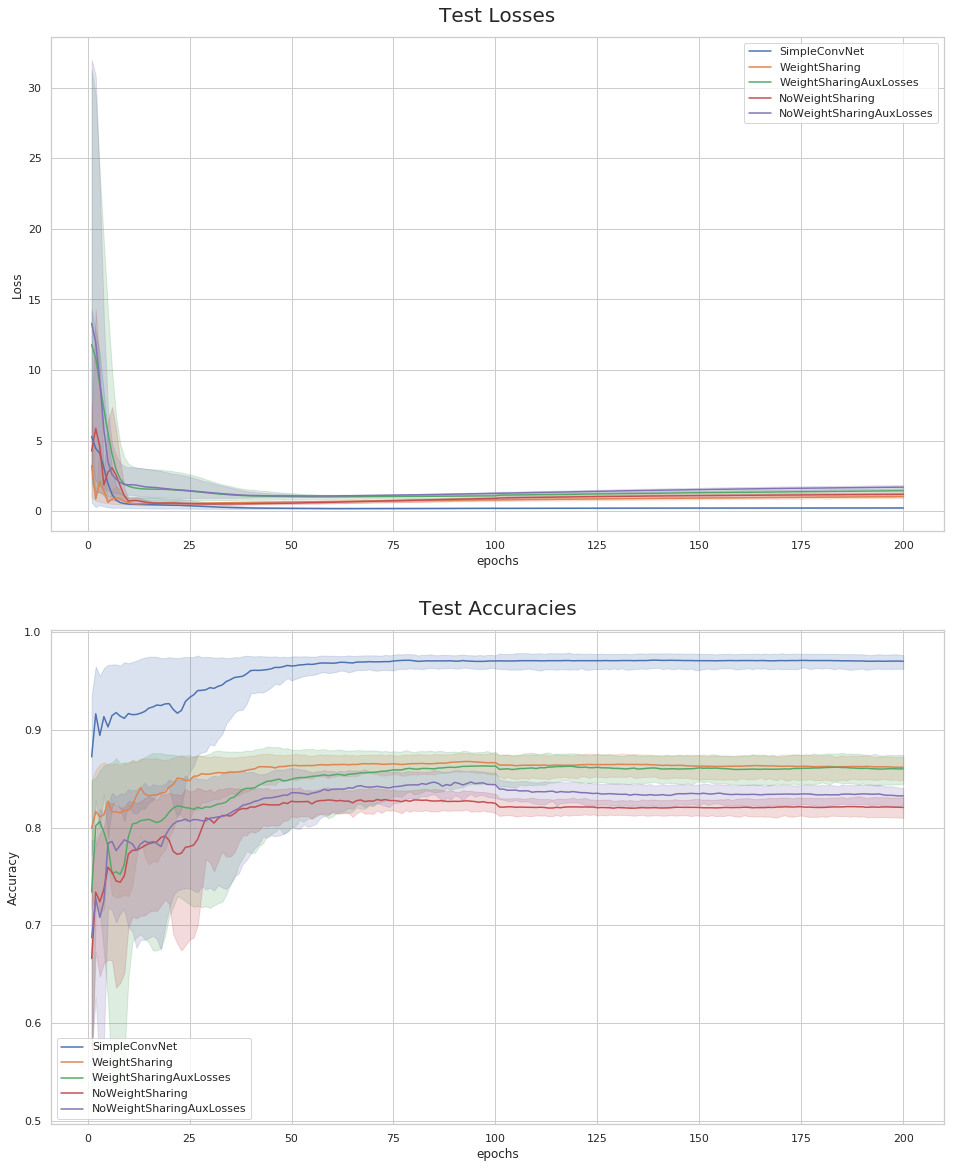

In [73]:
fig, axs = plt.subplots(2, 1, figsize=(16,20))
limit = 200
sns.lineplot(x="epoch", y="test_loss", data=df1, ax=axs[0], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_loss", data=df2, ax=axs[0], label="WeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df3, ax=axs[0], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_loss", data=df4, ax=axs[0], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df5, ax=axs[0], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_loss", data=df6, ax=axs[0], label="Linear");
#sns.lineplot(x="epoch", y="test_loss", data=df7, ax=axs[0], label="Logistic");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Test Losses", fontdict={"fontsize":20, "fontweight":1}, pad=15);
#axs[0].set_ylim(0, 10)
axs[0].legend();

sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=axs[1], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=axs[1], label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=axs[1], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=axs[1], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=axs[1], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

plt.show();

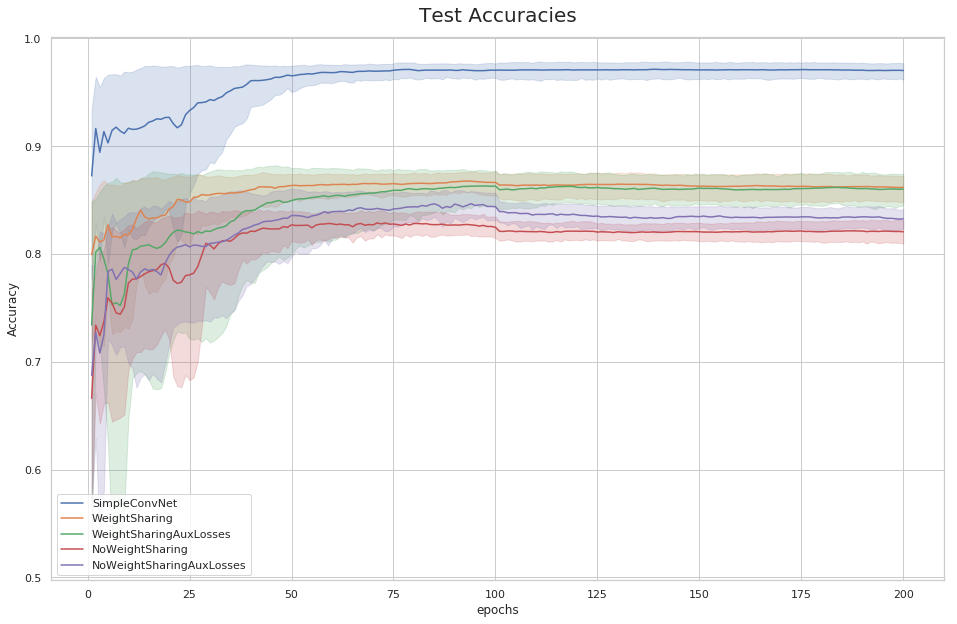

In [74]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=ax, label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=ax, label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=ax, label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=ax, label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=ax, label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
ax.set_xlabel("epochs");ax.set_ylabel("Accuracy");ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend();

In [78]:
df1['network'] = df1.apply(lambda x: "SimpleConvNet", axis=1)
df2['network'] = df2.apply(lambda x: "WeightSharing", axis=1)
df3['network'] = df3.apply(lambda x: "WeightSharingAuxLosses", axis=1)
df4['network'] = df4.apply(lambda x: "NoWeightSharing", axis=1)
df5['network'] = df5.apply(lambda x: "NoWeightSharingAuxLosses", axis=1)
#df6['network'] = df6.apply(lambda x: "Linear", axis=1)
#df7['network'] = df7.apply(lambda x: "Logistic", axis=1)

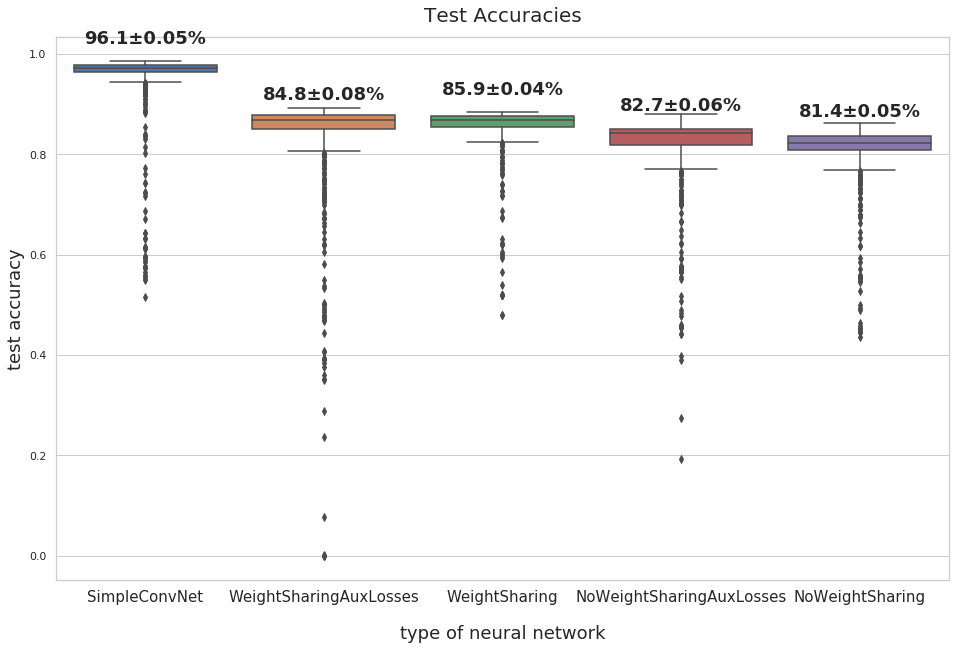

In [82]:
df = pd.concat([df1, df3, df2, df5, df4])

mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), fontsize=15)#, rotation=45)
ax.set_xlabel("type of neural network", fontsize=18, labelpad=20);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].mean()#.sort_values(ascending=False)
stds = df.groupby(['network'])['test_accuracy'].std()
vertical_offset = df['test_accuracy'].mean() * 0.07 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

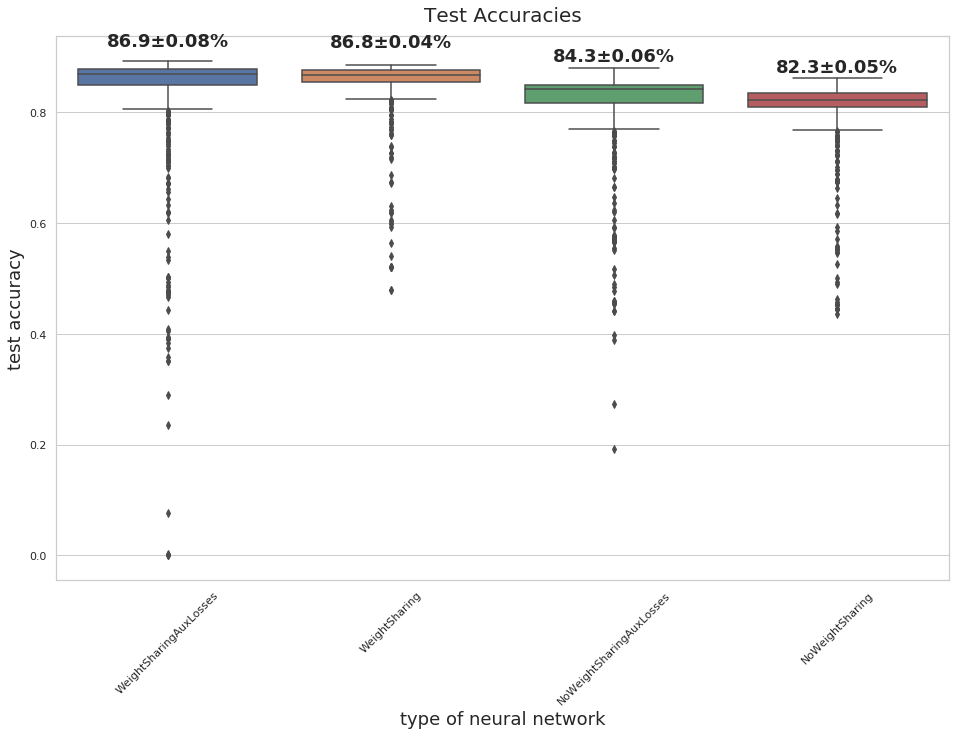

In [40]:
df = pd.concat([df3, df2, df5, df4])
mapping = {0: "WeightSharingAuxLosses", 1: "WeightSharing", 2: "NoWeightSharingAuxLosses", 3:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median().sort_values(ascending=False)
vertical_offset = df['test_accuracy'].mean() * 0.06 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

In [27]:
df1.to_csv("data/dfs/df1.csv", index=False)
df2.to_csv("data/dfs/df2.csv", index=False)
df3.to_csv("data/dfs/df3.csv", index=False)
df4.to_csv("data/dfs/df4.csv", index=False)
df5.to_csv("data/dfs/df5.csv", index=False)

# Performance: augmentation + Adam

In [22]:
import matplotlib.pyplot as plt

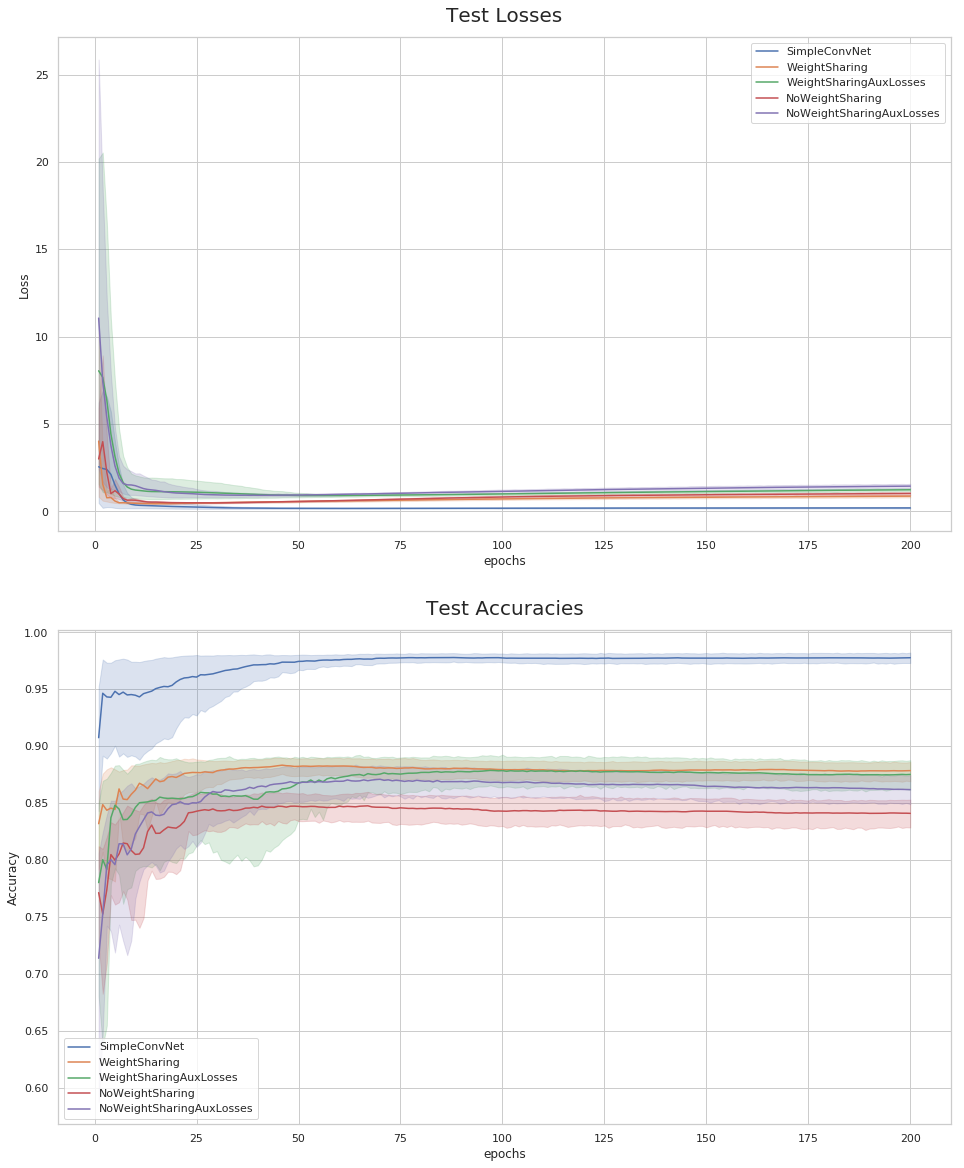

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(16,20))
limit = 200
sns.lineplot(x="epoch", y="test_loss", data=df1, ax=axs[0], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_loss", data=df2, ax=axs[0], label="WeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df3, ax=axs[0], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_loss", data=df4, ax=axs[0], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df5, ax=axs[0], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_loss", data=df6, ax=axs[0], label="Linear");
#sns.lineplot(x="epoch", y="test_loss", data=df7, ax=axs[0], label="Logistic");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Test Losses", fontdict={"fontsize":20, "fontweight":1}, pad=15);
#axs[0].set_ylim(0, 10)
axs[0].legend();

sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=axs[1], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=axs[1], label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=axs[1], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=axs[1], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=axs[1], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

plt.show();

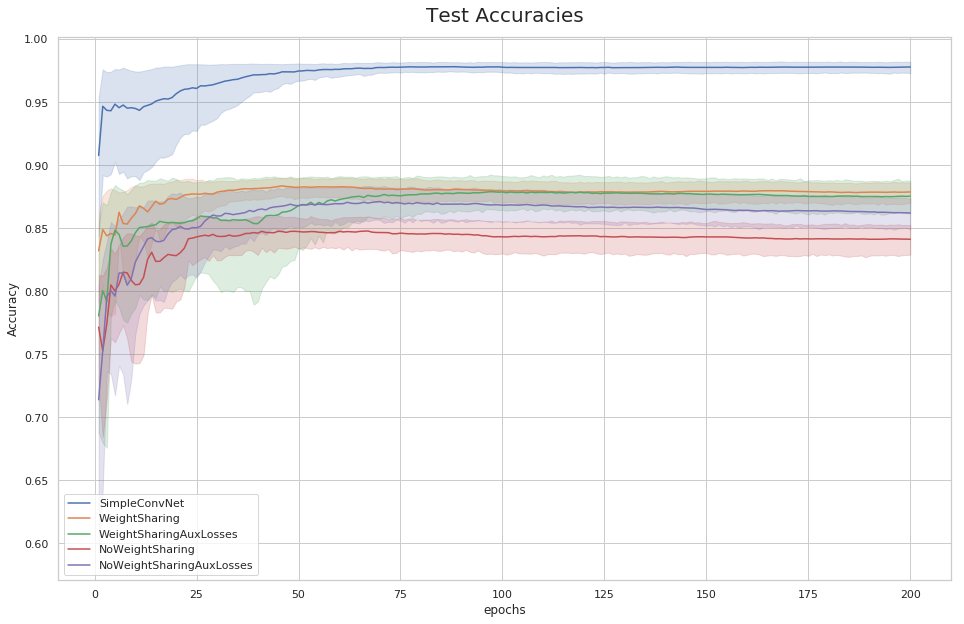

In [24]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=ax, label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=ax, label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=ax, label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=ax, label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=ax, label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
ax.set_xlabel("epochs");ax.set_ylabel("Accuracy");ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend();

In [25]:
df1['network'] = df1.apply(lambda x: "SimpleConvNet", axis=1)
df2['network'] = df2.apply(lambda x: "WeightSharing", axis=1)
df3['network'] = df3.apply(lambda x: "WeightSharingAuxLosses", axis=1)
df4['network'] = df4.apply(lambda x: "NoWeightSharing", axis=1)
df5['network'] = df5.apply(lambda x: "NoWeightSharingAuxLosses", axis=1)
#df6['network'] = df6.apply(lambda x: "Linear", axis=1)
#df7['network'] = df7.apply(lambda x: "Logistic", axis=1)

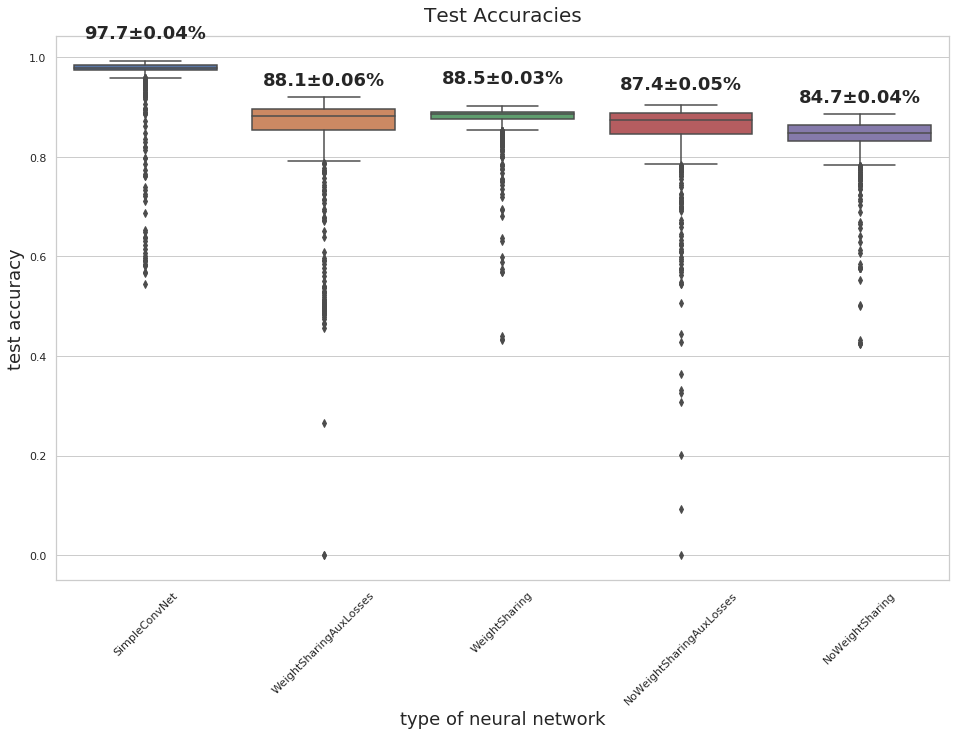

In [26]:
df = pd.concat([df1, df3, df2, df5, df4])
mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds = df.groupby(['network'])['test_accuracy'].std()
vertical_offset = df['test_accuracy'].mean() * 0.07 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

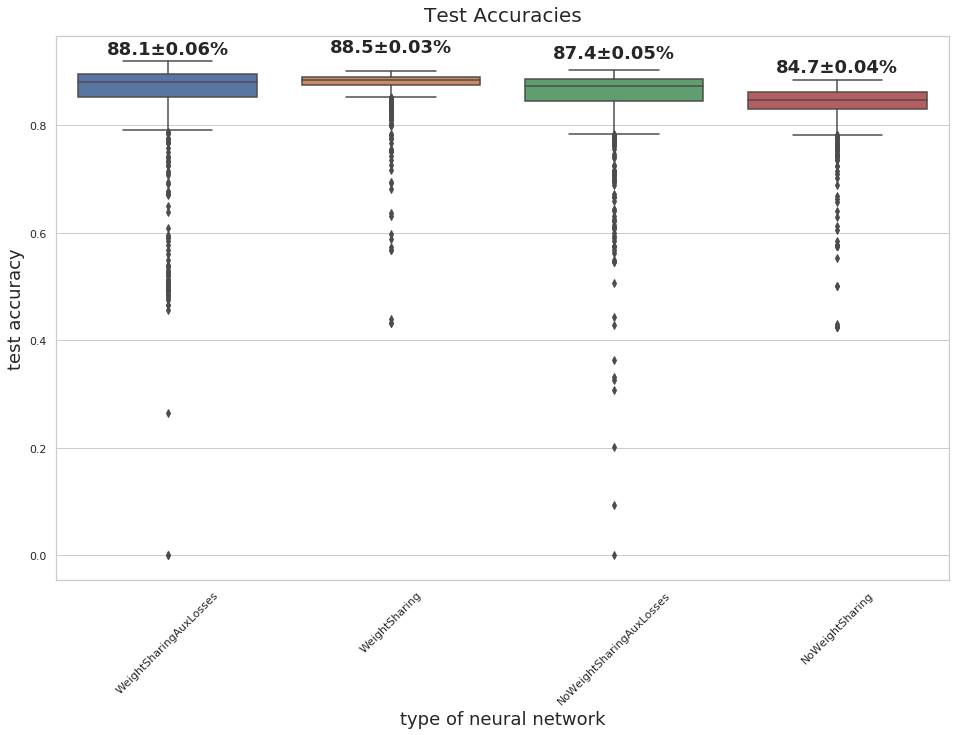

In [27]:
df = pd.concat([df3, df2, df5, df4])
mapping = {0: "WeightSharingAuxLosses", 1: "WeightSharing", 2: "NoWeightSharingAuxLosses", 3:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median().sort_values(ascending=False)
vertical_offset = df['test_accuracy'].mean() * 0.06 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

In [29]:
df1.to_csv("data/dfs/df1_augmentation2.csv", index=False)
df2.to_csv("data/dfs/df2_augmentation2.csv", index=False)
df3.to_csv("data/dfs/df3_augmentation2.csv", index=False)
df4.to_csv("data/dfs/df4_augmentation2.csv", index=False)
df5.to_csv("data/dfs/df5_augmentation2.csv", index=False)

# Performance: Augmented vs. Not Augmented + Adam

In [31]:
nrows = 1500
df1 = pd.read_csv("data/dfs/df1.csv", nrows=nrows)
df2 = pd.read_csv("data/dfs/df2.csv", nrows=nrows)
df3 = pd.read_csv("data/dfs/df3.csv", nrows=nrows)
df4 = pd.read_csv("data/dfs/df4.csv", nrows=nrows)
df5 = pd.read_csv("data/dfs/df5.csv", nrows=nrows)

In [32]:
dfa1 = pd.read_csv("data/dfs/df1_augmentation2.csv")
dfa2 = pd.read_csv("data/dfs/df2_augmentation2.csv")
dfa3 = pd.read_csv("data/dfs/df3_augmentation2.csv")
dfa4 = pd.read_csv("data/dfs/df4_augmentation2.csv")
dfa5 = pd.read_csv("data/dfs/df5_augmentation2.csv")

In [33]:
df1.shape, dfa1.shape

((1500, 7), (3000, 7))

In [34]:
df = pd.concat([df1, df3, df2, df5, df4])
df['augmentation'] = df.apply(lambda x: "not_augmented", axis=1)

In [35]:
dfa = pd.concat([dfa1, dfa3, dfa2, dfa5, dfa4])
dfa['augmentation'] = dfa.apply(lambda x: "augmented", axis=1)

In [36]:
df = pd.concat([dfa, df])

In [37]:
df.head()

,run,epoch,train_loss,test_loss,train_accuracy,test_accuracy,network,augmentation
0,0,1,9.288581,26.698223,0.523,0.545,SimpleConvNet,augmented
1,0,2,26.994652,33.451714,0.513,0.581,SimpleConvNet,augmented
2,0,3,34.254166,31.593262,0.535,0.591,SimpleConvNet,augmented
3,0,4,31.901756,26.557720,0.607,0.615,SimpleConvNet,augmented
4,0,5,26.661873,18.203375,0.594,0.653,SimpleConvNet,augmented


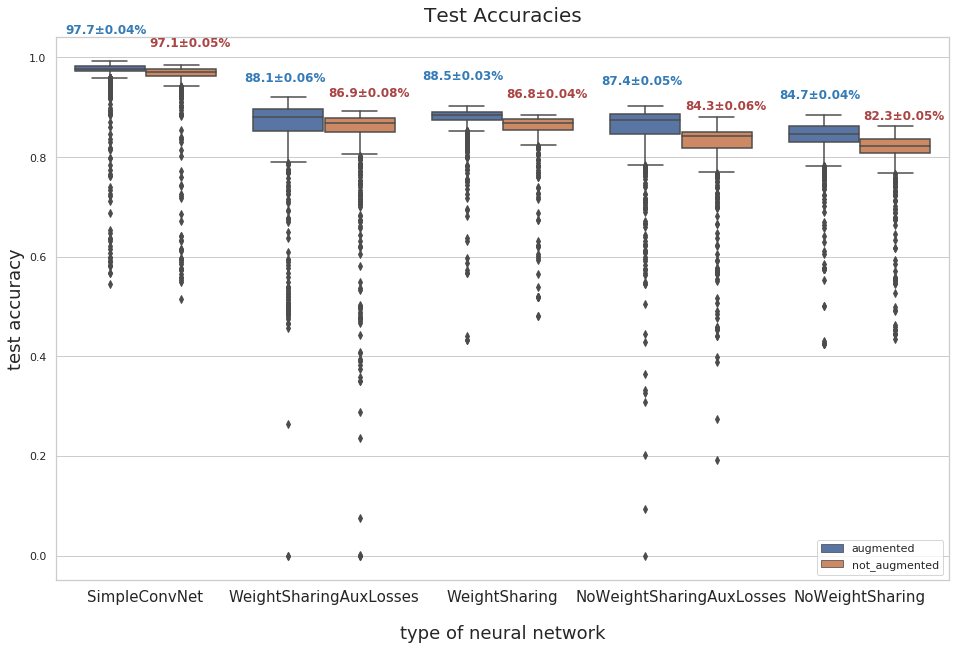

In [38]:
#df = pd.concat([df1, df3, df2, df5, df4])
mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", hue="augmentation", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), fontsize=15)#, rotation=45)
ax.set_xlabel("type of neural network", fontsize=18, labelpad=20);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend(loc=4)

medians_na = df[df.augmentation=='not_augmented'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds_na = df[df.augmentation=='not_augmented'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.augmentation=='not_augmented']['test_accuracy'].mean() * 0.06 # offset from median for display
horizontal_offset = 0.25

for xtick in box_plot.get_xticks():
    box_plot.text(xtick+horizontal_offset, 
                  medians_na[mapping[xtick]] + vertical_offset, 
                  f"{medians_na[mapping[xtick]]*100:.1f}±{stds_na[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=12, color='#A94442')

medians = df[df.augmentation=='augmented'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds = df[df.augmentation=='augmented'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.augmentation=='augmented']['test_accuracy'].mean() * 0.08 # offset from median for display
horizontal_offset = 0.22
for xtick in box_plot.get_xticks():
    box_plot.text(xtick-horizontal_offset, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=12, color='#337AB7')

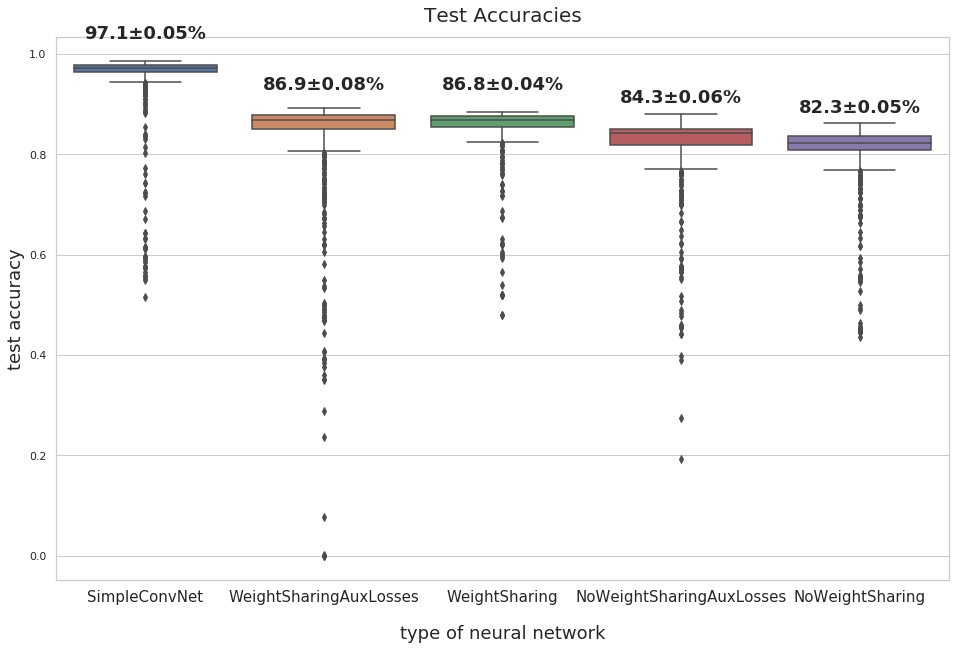

In [100]:
#df = pd.concat([df1, df3, df2, df5, df4])

mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), fontsize=15)#, rotation=45)
ax.set_xlabel("type of neural network", fontsize=18, labelpad=20);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds = df.groupby(['network'])['test_accuracy'].std()
vertical_offset = df['test_accuracy'].mean() * 0.07 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

---

# Performance: augmentation + RMSProp

In [22]:
import matplotlib.pyplot as plt

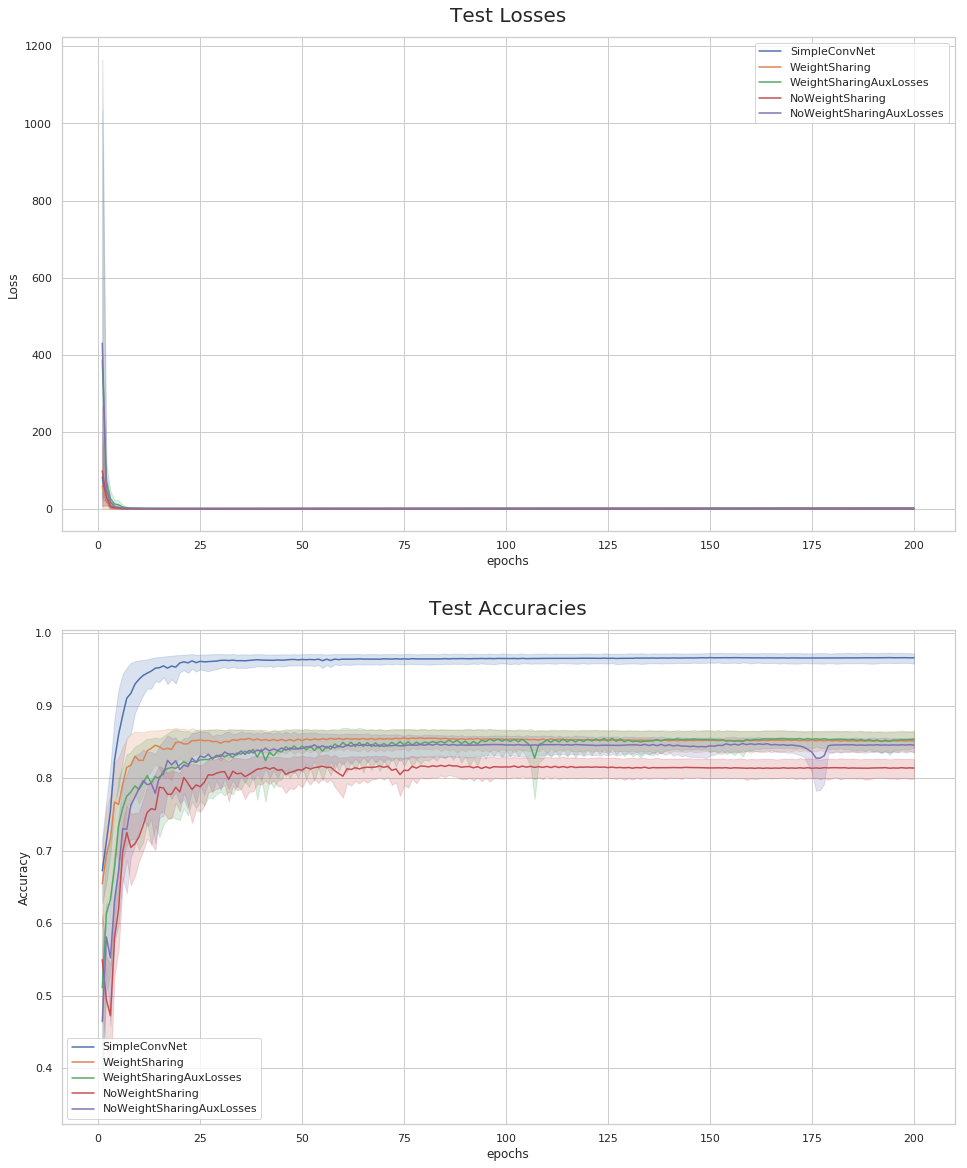

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(16,20))
limit = 200
sns.lineplot(x="epoch", y="test_loss", data=df1, ax=axs[0], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_loss", data=df2, ax=axs[0], label="WeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df3, ax=axs[0], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_loss", data=df4, ax=axs[0], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df5, ax=axs[0], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_loss", data=df6, ax=axs[0], label="Linear");
#sns.lineplot(x="epoch", y="test_loss", data=df7, ax=axs[0], label="Logistic");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Test Losses", fontdict={"fontsize":20, "fontweight":1}, pad=15);
#axs[0].set_ylim(0, 10)
axs[0].legend();

sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=axs[1], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=axs[1], label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=axs[1], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=axs[1], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=axs[1], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

plt.show();

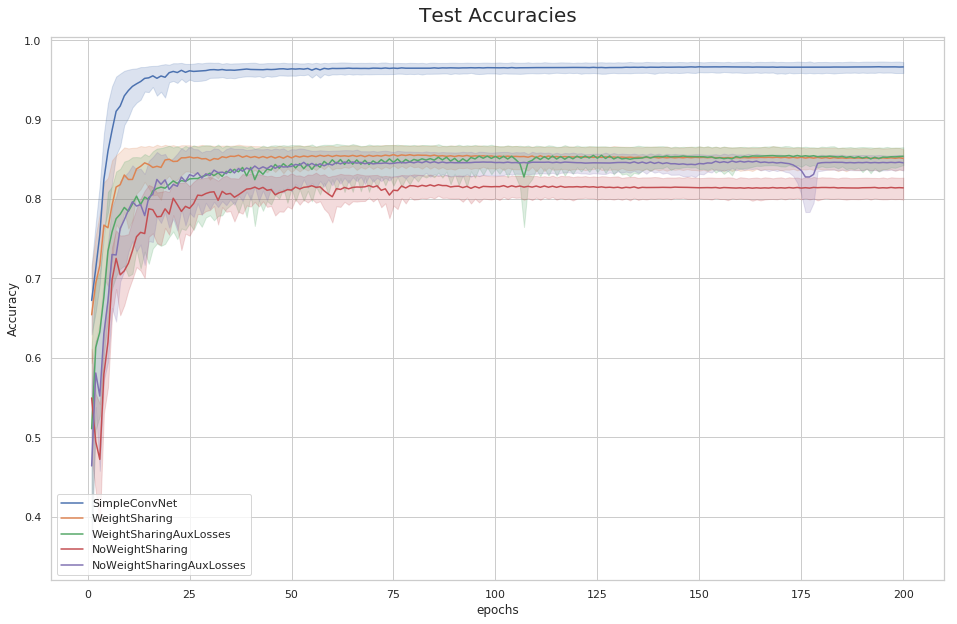

In [24]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=ax, label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=ax, label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=ax, label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=ax, label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=ax, label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
ax.set_xlabel("epochs");ax.set_ylabel("Accuracy");ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend();

In [25]:
df1['network'] = df1.apply(lambda x: "SimpleConvNet", axis=1)
df2['network'] = df2.apply(lambda x: "WeightSharing", axis=1)
df3['network'] = df3.apply(lambda x: "WeightSharingAuxLosses", axis=1)
df4['network'] = df4.apply(lambda x: "NoWeightSharing", axis=1)
df5['network'] = df5.apply(lambda x: "NoWeightSharingAuxLosses", axis=1)
#df6['network'] = df6.apply(lambda x: "Linear", axis=1)
#df7['network'] = df7.apply(lambda x: "Logistic", axis=1)

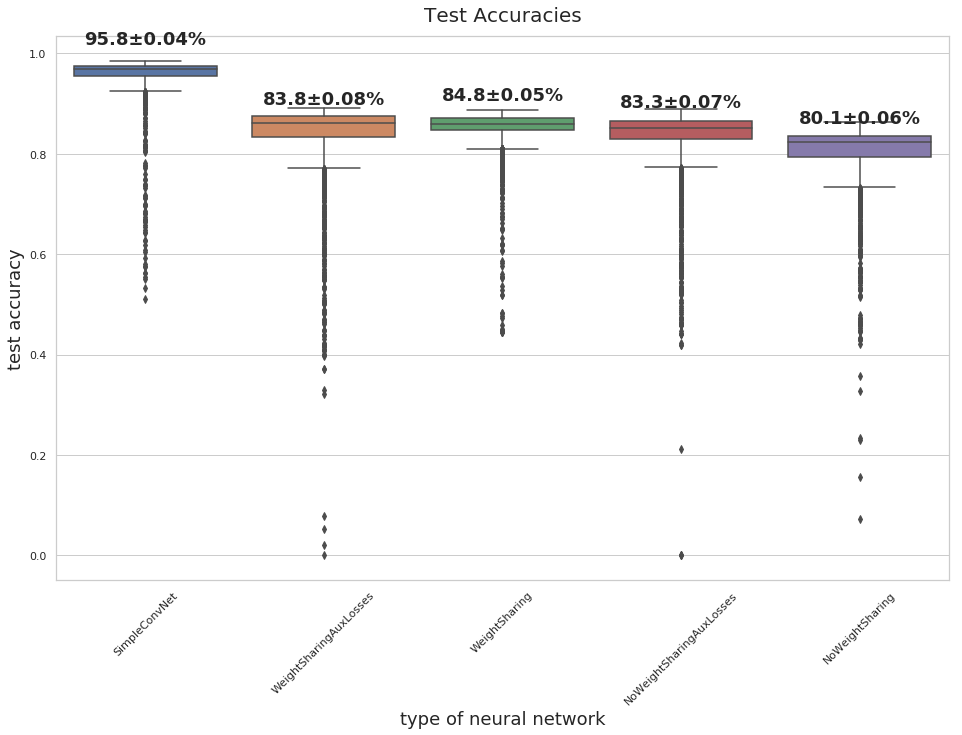

In [26]:
df = pd.concat([df1, df3, df2, df5, df4])
mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].mean()#.sort_values(ascending=False)
stds = df.groupby(['network'])['test_accuracy'].std()
vertical_offset = df['test_accuracy'].mean() * 0.07 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

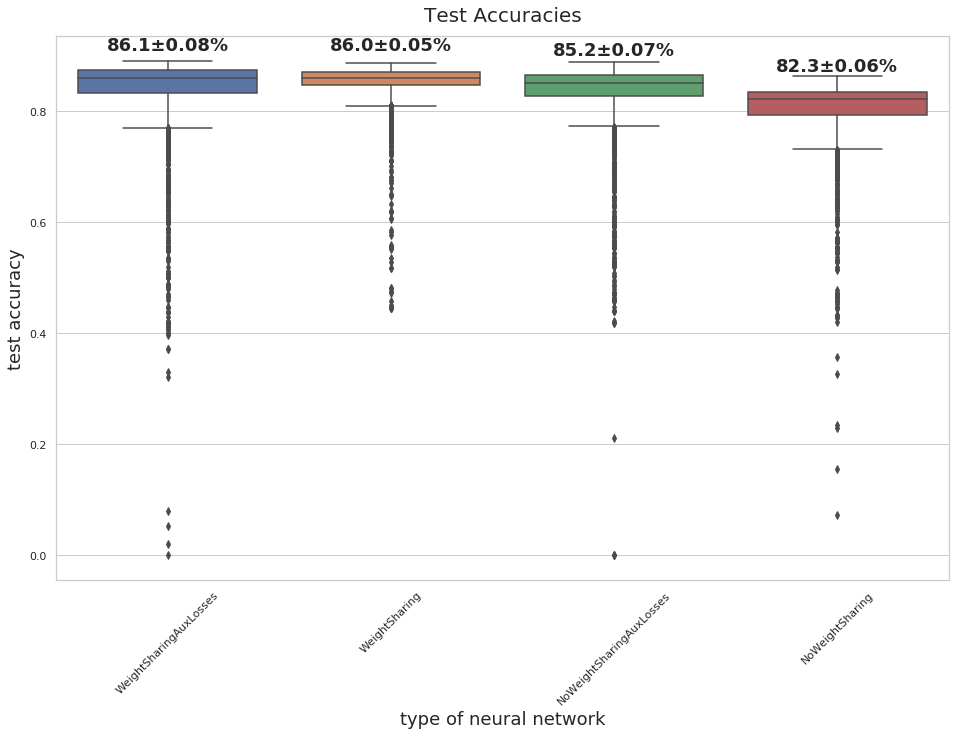

In [27]:
df = pd.concat([df3, df2, df5, df4])
mapping = {0: "WeightSharingAuxLosses", 1: "WeightSharing", 2: "NoWeightSharingAuxLosses", 3:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median().sort_values(ascending=False)
vertical_offset = df['test_accuracy'].mean() * 0.06 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

In [28]:
df1.to_csv("data/dfs/df1_rmsprop_augmented.csv", index=False)
df2.to_csv("data/dfs/df2_rmsprop_augmented.csv", index=False)
df3.to_csv("data/dfs/df3_rmsprop_augmented.csv", index=False)
df4.to_csv("data/dfs/df4_rmsprop_augmented.csv", index=False)
df5.to_csv("data/dfs/df5_rmsprop_augmented.csv", index=False)

---

# Performance: Adam vs. RMSProp + Augmented

In [29]:
df1 = pd.read_csv("data/dfs/df1_rmsprop_augmented.csv")
df2 = pd.read_csv("data/dfs/df2_rmsprop_augmented.csv")
df3 = pd.read_csv("data/dfs/df3_rmsprop_augmented.csv")
df4 = pd.read_csv("data/dfs/df4_rmsprop_augmented.csv")
df5 = pd.read_csv("data/dfs/df5_rmsprop_augmented.csv")

In [30]:
dfa1 = pd.read_csv("data/dfs/df1_augmentation.csv")
dfa2 = pd.read_csv("data/dfs/df2_augmentation.csv")
dfa3 = pd.read_csv("data/dfs/df3_augmentation.csv")
dfa4 = pd.read_csv("data/dfs/df4_augmentation.csv")
dfa5 = pd.read_csv("data/dfs/df5_augmentation.csv")

In [31]:
df = pd.concat([df1, df3, df2, df5, df4])
df['optimizer'] = df.apply(lambda x: "RMSProp", axis=1)

In [32]:
dfa = pd.concat([dfa1, dfa3, dfa2, dfa5, dfa4])
dfa['optimizer'] = dfa.apply(lambda x: "Adam", axis=1)

In [33]:
df = pd.concat([dfa, df])

In [34]:
df.head()

,run,epoch,train_loss,test_loss,train_accuracy,test_accuracy,network,optimizer
0,0,1,7.302147,29.161560,0.550,0.624,SimpleConvNet,Adam
1,0,2,27.156446,35.762836,0.623,0.613,SimpleConvNet,Adam
2,0,3,34.017639,31.892021,0.605,0.561,SimpleConvNet,Adam
3,0,4,30.869629,21.477436,0.549,0.571,SimpleConvNet,Adam
4,0,5,21.202667,12.438026,0.606,0.475,SimpleConvNet,Adam


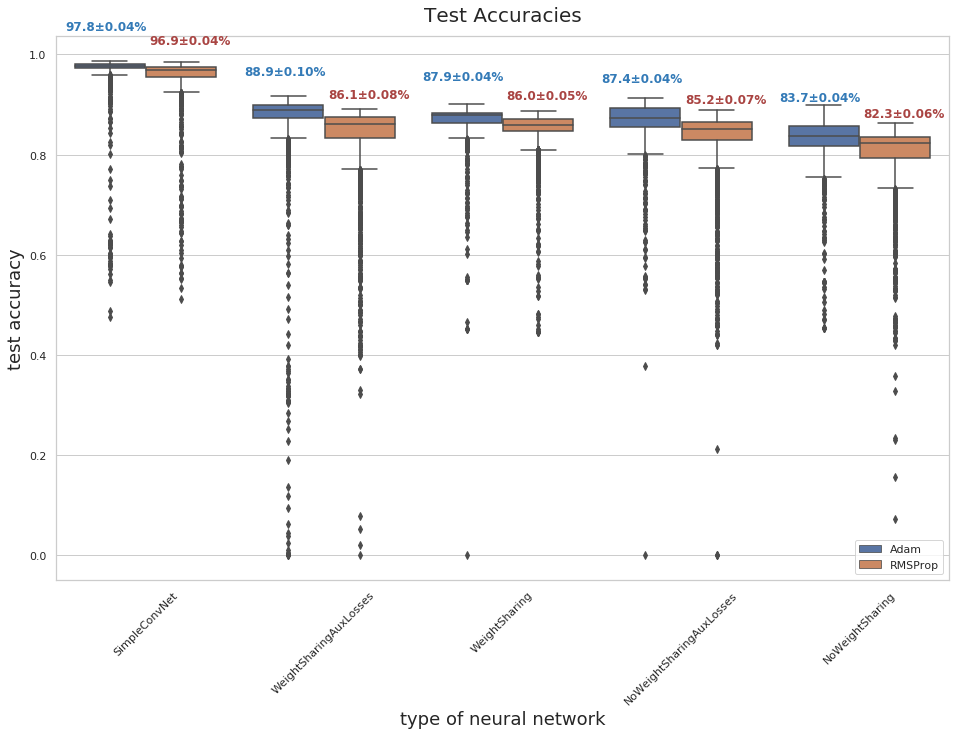

In [35]:
#df = pd.concat([df1, df3, df2, df5, df4])
mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", hue="optimizer", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend(loc=4)

medians_na = df[df.optimizer=='RMSProp'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds_na = df[df.optimizer=='RMSProp'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.optimizer=='RMSProp']['test_accuracy'].mean() * 0.06 # offset from median for display
horizontal_offset = 0.25

for xtick in box_plot.get_xticks():
    box_plot.text(xtick+horizontal_offset, 
                  medians_na[mapping[xtick]] + vertical_offset, 
                  f"{medians_na[mapping[xtick]]*100:.1f}±{stds_na[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=12, color='#A94442')

medians = df[df.optimizer=='Adam'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds = df[df.optimizer=='Adam'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.optimizer=='Adam']['test_accuracy'].mean() * 0.08 # offset from median for display
horizontal_offset = 0.22
for xtick in box_plot.get_xticks():
    box_plot.text(xtick-horizontal_offset, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=12, color='#337AB7')

# Performance: augmentation + SGD

In [21]:
import matplotlib.pyplot as plt

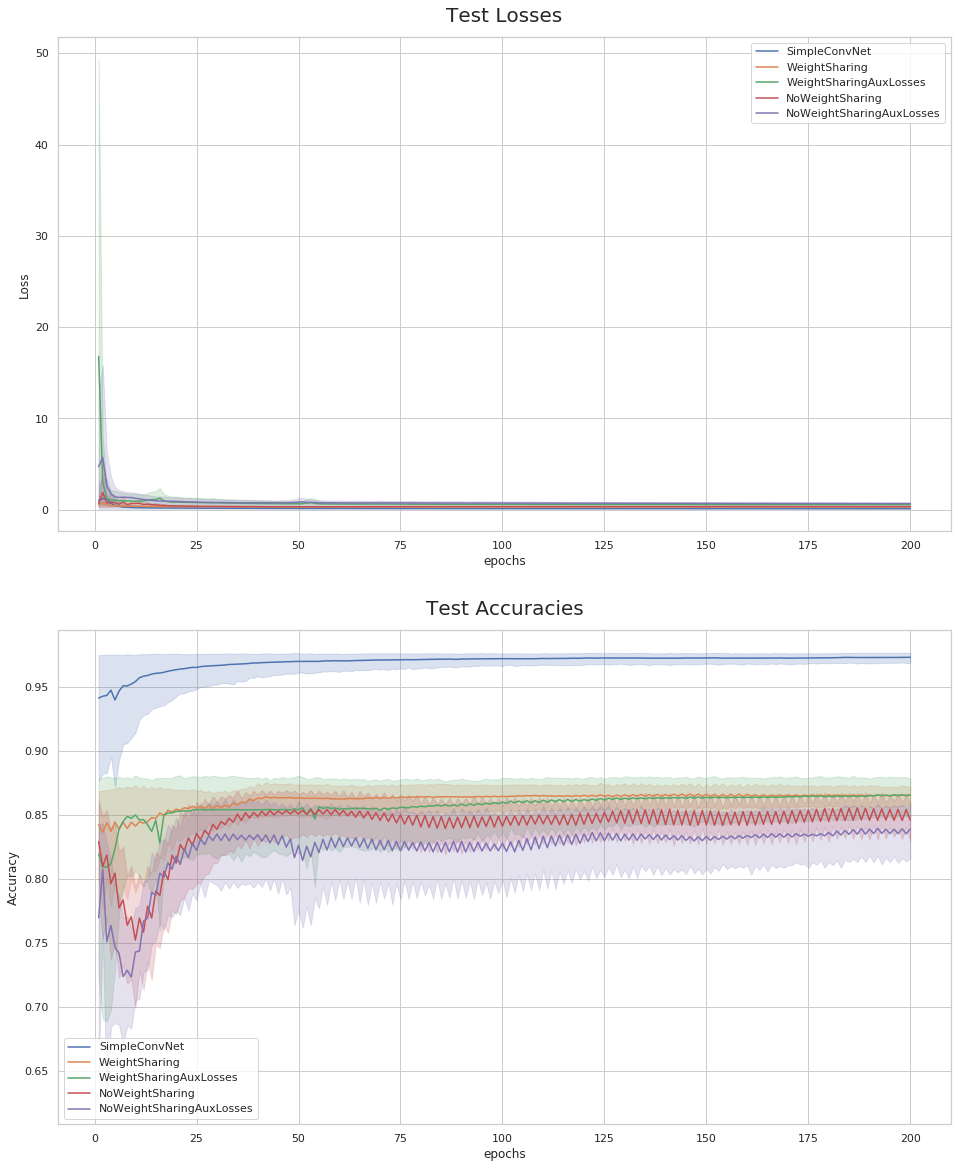

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(16,20))
limit = 200
sns.lineplot(x="epoch", y="test_loss", data=df1, ax=axs[0], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_loss", data=df2, ax=axs[0], label="WeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df3, ax=axs[0], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_loss", data=df4, ax=axs[0], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df5, ax=axs[0], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_loss", data=df6, ax=axs[0], label="Linear");
#sns.lineplot(x="epoch", y="test_loss", data=df7, ax=axs[0], label="Logistic");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Test Losses", fontdict={"fontsize":20, "fontweight":1}, pad=15);
#axs[0].set_ylim(0, 10)
axs[0].legend();

sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=axs[1], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=axs[1], label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=axs[1], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=axs[1], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=axs[1], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

plt.show();

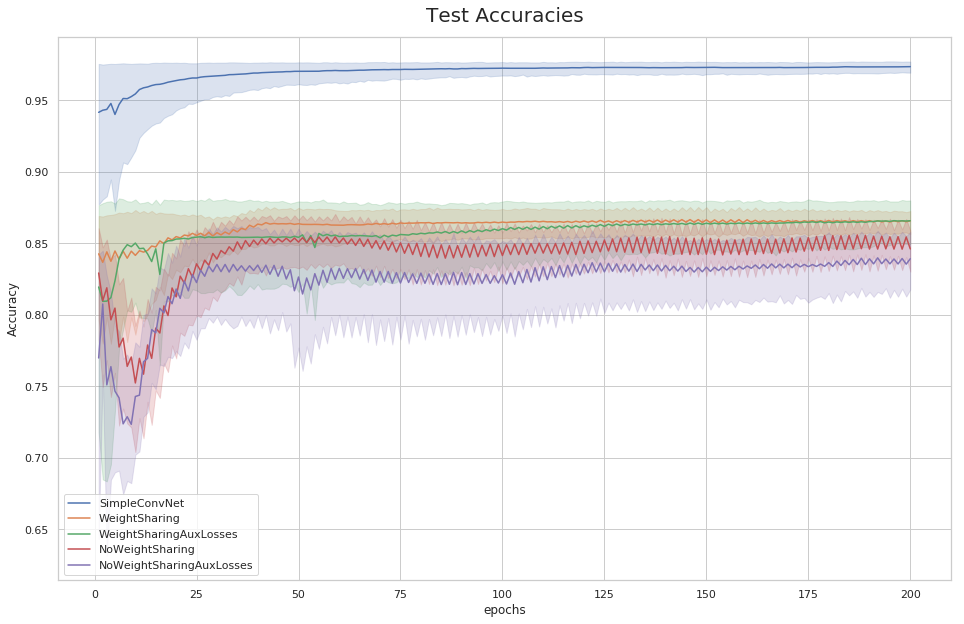

In [23]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=ax, label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=ax, label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=ax, label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=ax, label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=ax, label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
ax.set_xlabel("epochs");ax.set_ylabel("Accuracy");ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend();

In [24]:
df1['network'] = df1.apply(lambda x: "SimpleConvNet", axis=1)
df2['network'] = df2.apply(lambda x: "WeightSharing", axis=1)
df3['network'] = df3.apply(lambda x: "WeightSharingAuxLosses", axis=1)
df4['network'] = df4.apply(lambda x: "NoWeightSharing", axis=1)
df5['network'] = df5.apply(lambda x: "NoWeightSharingAuxLosses", axis=1)
#df6['network'] = df6.apply(lambda x: "Linear", axis=1)
#df7['network'] = df7.apply(lambda x: "Logistic", axis=1)

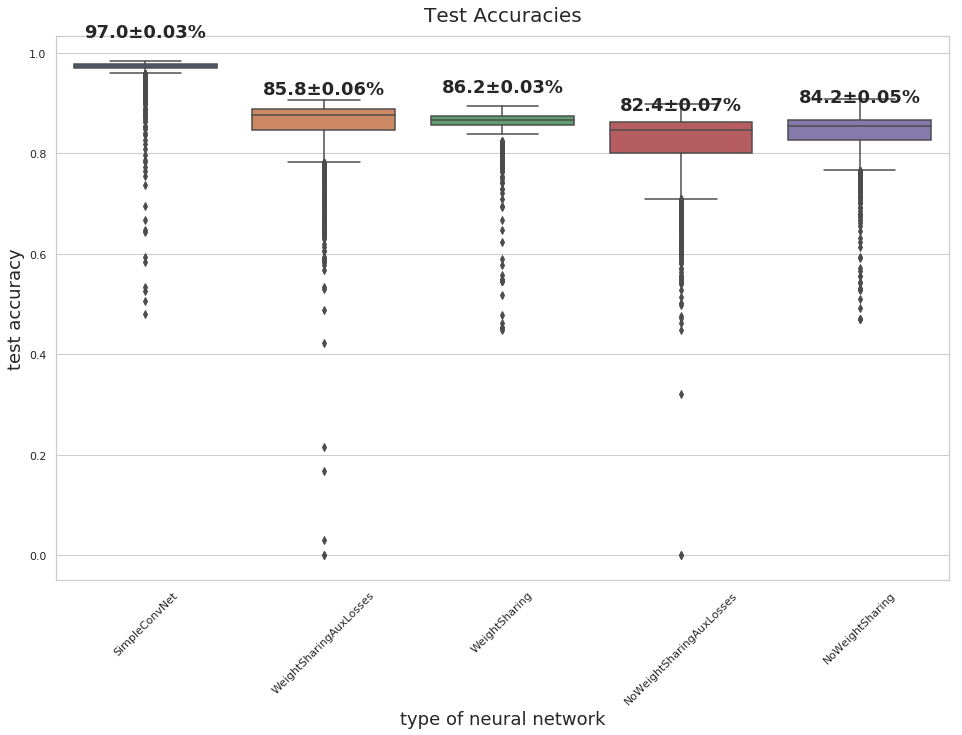

In [25]:
df = pd.concat([df1, df3, df2, df5, df4])
mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].mean()#.sort_values(ascending=False)
stds = df.groupby(['network'])['test_accuracy'].std()
vertical_offset = df['test_accuracy'].mean() * 0.07 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

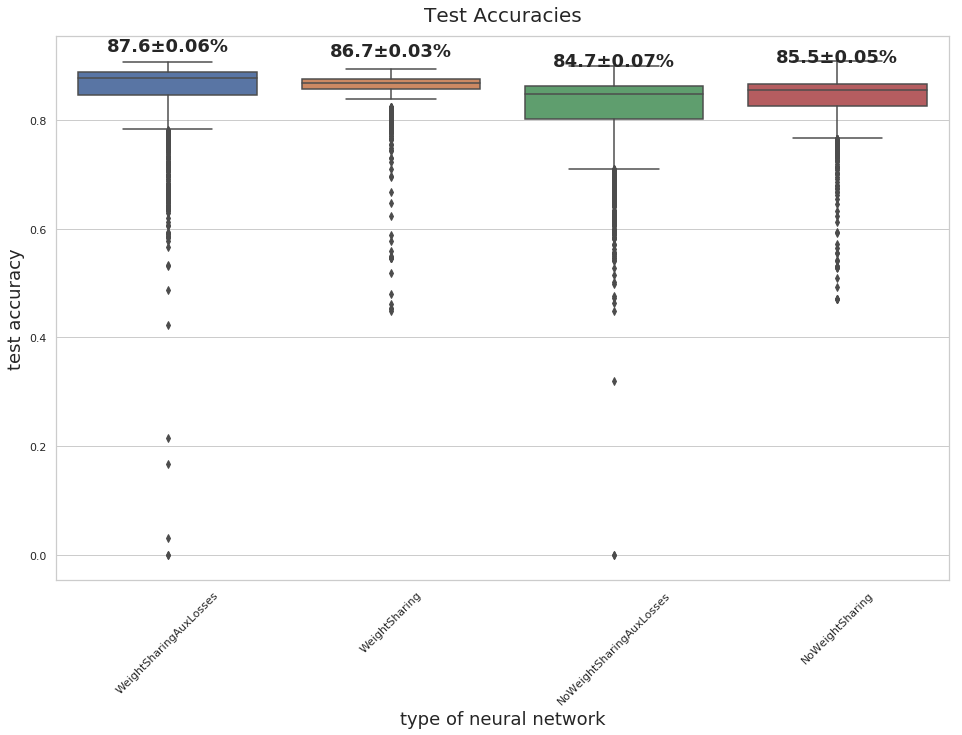

In [26]:
df = pd.concat([df3, df2, df5, df4])
mapping = {0: "WeightSharingAuxLosses", 1: "WeightSharing", 2: "NoWeightSharingAuxLosses", 3:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median().sort_values(ascending=False)
vertical_offset = df['test_accuracy'].mean() * 0.06 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

In [27]:
df1.to_csv("data/dfs/df1_sgd_augmented.csv", index=False)
df2.to_csv("data/dfs/df2_sgd_augmented.csv", index=False)
df3.to_csv("data/dfs/df3_sgd_augmented.csv", index=False)
df4.to_csv("data/dfs/df4_sgd_augmented.csv", index=False)
df5.to_csv("data/dfs/df5_sgd_augmented.csv", index=False)

---

# Performance: Adam vs. RMSProp vs. SGD + Augmented

In [23]:
df1 = pd.read_csv("data/dfs/df1_sgd_augmented.csv")
df2 = pd.read_csv("data/dfs/df2_sgd_augmented.csv")
df3 = pd.read_csv("data/dfs/df3_sgd_augmented.csv")
df4 = pd.read_csv("data/dfs/df4_sgd_augmented.csv")
df5 = pd.read_csv("data/dfs/df5_sgd_augmented.csv")

In [24]:
dfr1 = pd.read_csv("data/dfs/df1_rmsprop_augmented.csv")
dfr2 = pd.read_csv("data/dfs/df2_rmsprop_augmented.csv")
dfr3 = pd.read_csv("data/dfs/df3_rmsprop_augmented.csv")
dfr4 = pd.read_csv("data/dfs/df4_rmsprop_augmented.csv")
dfr5 = pd.read_csv("data/dfs/df5_rmsprop_augmented.csv")

In [25]:
dfa1 = pd.read_csv("data/dfs/df1_augmentation.csv")
dfa2 = pd.read_csv("data/dfs/df2_augmentation.csv")
dfa3 = pd.read_csv("data/dfs/df3_augmentation.csv")
dfa4 = pd.read_csv("data/dfs/df4_augmentation.csv")
dfa5 = pd.read_csv("data/dfs/df5_augmentation.csv")

In [26]:
df = pd.concat([df1, df3, df2, df5, df4])
df['optimizer'] = df.apply(lambda x: "SGD", axis=1)

In [27]:
dfr = pd.concat([dfr1, dfr3, dfr2, dfr5, dfr4])
dfr['optimizer'] = dfr.apply(lambda x: "RMSProp", axis=1)

In [28]:
dfa = pd.concat([dfa1, dfa3, dfa2, dfa5, dfa4])
dfa['optimizer'] = dfa.apply(lambda x: "Adam", axis=1)

In [29]:
df = pd.concat([dfa, df, dfr])

In [30]:
df.optimizer.unique()

array(['Adam', 'SGD', 'RMSProp'], dtype=object)

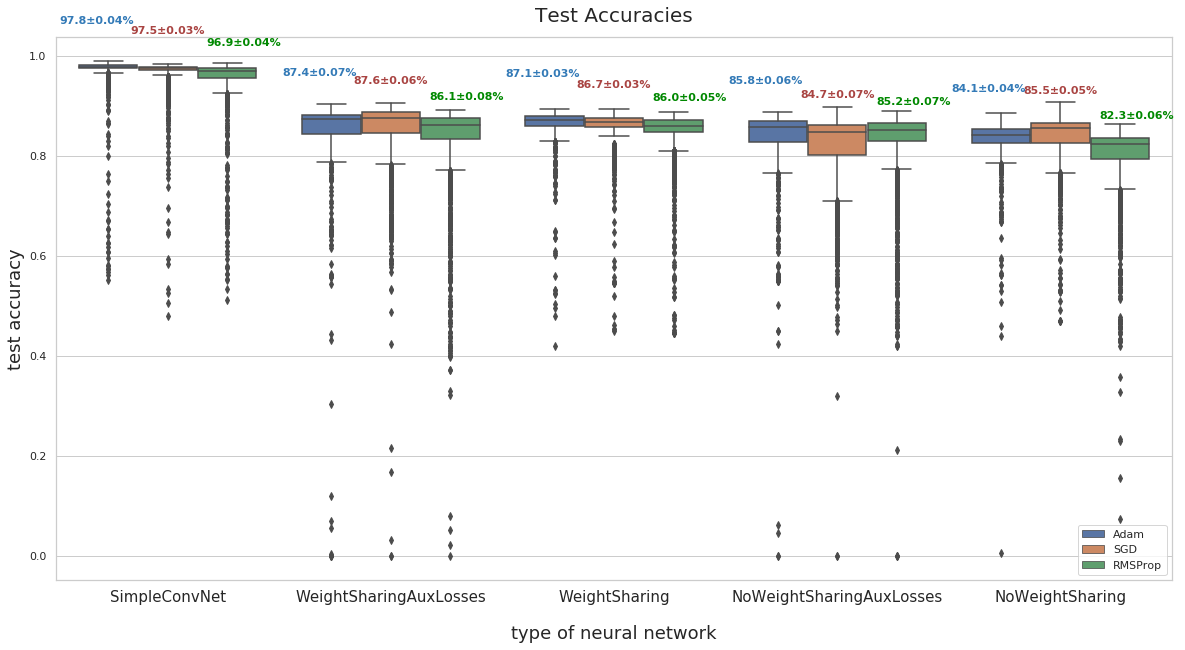

In [33]:
#df = pd.concat([df1, df3, df2, df5, df4])
mapping = {0: "SimpleConvNet", 1: "WeightSharingAuxLosses", 2: "WeightSharing", 3: "NoWeightSharingAuxLosses", 4:"NoWeightSharing"}

fig, ax = plt.subplots(figsize=(20,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", hue="optimizer", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), fontsize=15)#, rotation=45)
ax.set_xlabel("type of neural network", fontsize=18, labelpad=20);
ax.set_ylabel("test accuracy", fontsize=18);
ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
ax.legend(loc=4)


    
medians_na = df[df.optimizer=='RMSProp'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds_na = df[df.optimizer=='RMSProp'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.optimizer=='RMSProp']['test_accuracy'].mean() * 0.06 # offset from median for display
horizontal_offset = 0.34
for xtick in box_plot.get_xticks():
    box_plot.text(xtick+horizontal_offset, 
                  medians_na[mapping[xtick]] + vertical_offset, 
                  f"{medians_na[mapping[xtick]]*100:.1f}±{stds_na[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=11, color='#008800')

medians = df[df.optimizer=='SGD'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds = df[df.optimizer=='SGD'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.optimizer=='SGD']['test_accuracy'].mean() * 0.08 # offset from median for display
horizontal_offset = 0.0
for xtick in box_plot.get_xticks():
    box_plot.text(xtick-horizontal_offset, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=11, color='#A94442')
    
medians = df[df.optimizer=='Adam'].groupby(['network'])['test_accuracy'].median()#.sort_values(ascending=False)
stds = df[df.optimizer=='Adam'].groupby(['network'])['test_accuracy'].std()
vertical_offset = df[df.optimizer=='Adam']['test_accuracy'].mean() * 0.1 # offset from median for display
horizontal_offset = 0.32
for xtick in box_plot.get_xticks():
    box_plot.text(xtick-horizontal_offset, 
                  medians[mapping[xtick]] + vertical_offset, 
                  f"{medians[mapping[xtick]]*100:.1f}±{stds[mapping[xtick]]:.2f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=11, color='#337AB7')
    
